<div style="background-color: #004B87; padding: 20px; border-radius: 10px;">
    <img src="https://cdn-assets-us.frontify.com/s3/frontify-enterprise-files-us/eyJwYXRoIjoibWlsbGltYW5cL2ZpbGVcL2l3dHhYOHJqV3pVUUV0R3hLc0FGLnN2ZyJ9:milliman:1F1qJpvDxGMTndryYS7nEiCYPRFCCi7l2rEhgnpdkGo?width=2400" width="300" height="150" alt="SVG Image" />
    <center>
        <div style="font-size: 3em;">IABE Data Science Certificate</div>
        <div style="font-size: 2em;"> Module 2 - Session 4 - Ensemble Methods</div>
        <div style="font-size: 1em;">11th March, 2025</div>
    </center>
</div>

# Ensemble Methods for Regression: An Actuarial Use Case

In this notebook, we will explore ensemble methods for regression using scikit-learn. Specifically, we'll focus on Random Forest and Bagging regressors to improve prediction accuracy and reduce overfitting. We'll apply these techniques to an actuarial dataset to predict insurance claim amounts.

## Objectives
- Understand ensemble methods: Random Forest and Bagging.
- Perform data loading, exploration, and cleaning.
- Build and evaluate ensemble models.
- Visualize the results to interpret model performance.

## Table of Contents
1. [Libraries and Setup](#Libraries-and-Setup)
2. [Data Loading](#Data-Loading)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
5. [Modeling with Ensemble Methods](#Modeling-with-Ensemble-Methods)
6. [Model Evaluation](#Model-Evaluation)
7. [Visualization of Results](#Visualization-of-Results)
8. [Conclusion](#Conclusion)

## Speakers

**Daniël Van Dam**
<br />
Daniël is a consultant with 9+ years of experience in the financial sector, with experience in AI and data science.
<br />
Mail address: daniel.vandam@milliman.com


## Resources

### Dataset:
1. [Medical cost](https://www.kaggle.com/datasets/mirichoi0218/insurance/data)<br />


#### Insurance Dataset

This dataset contains information about insurance charges along with various attributes related to the insured individuals. The dataset can be used for regression analysis to predict insurance charges based on the following attributes:

- `age`: Age of the insured individual.
- `sex`: Gender of the insured individual (male or female).
- `bmi`: Body Mass Index of the insured individual, providing a measure of body fat based on height and weight.
- `children`: Number of children/dependents covered by the insurance.
- `smoker`: Smoking status of the insured individual (yes or no).
- `region`: Residential region of the insured individual in the United States (northeast, southeast, southwest, northwest).
- `charges`: Medical insurance charges billed by the insurance company.

The dataset is often used for predictive modeling, particularly to build regression models that estimate insurance charges based on the other attributes.


## Libraries and Setup

In [1]:
# Data
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Model data prep
from sklearn.model_selection import train_test_split

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import PartialDependenceDisplay

In [2]:
%matplotlib inline
sns.set(style="whitegrid")

## Data Loading

For this exercise, we'll use the __Insurance Claim Dataset__. This dataset contains information about insurance policies, including demographics and claim amounts.


In [3]:
# Load the dataset
df = pd.read_csv("insurance.csv")

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)

Let's explore the dataset to understand its structure and identify any patterns or anomalies.

### Dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Statistical summary

In [6]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Distribution of the target variable: Insurance Charges

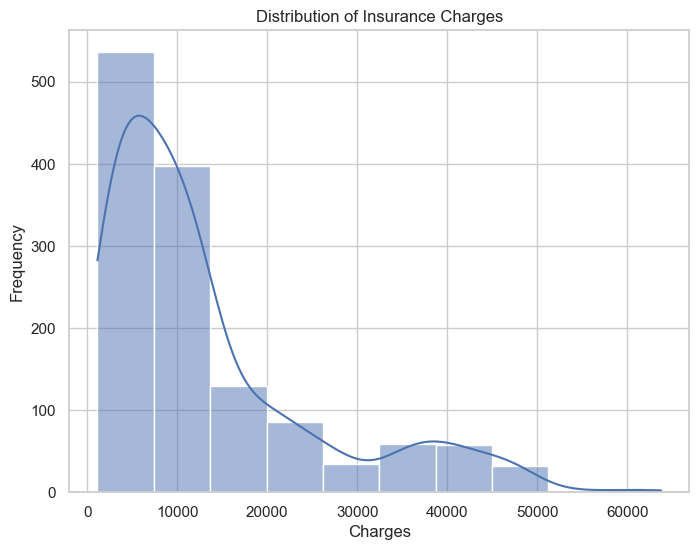

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(df['charges'], kde=True, bins=10)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## Choosing the Number of Bins in a Histogram

Selecting an appropriate number of bins is essential for accurately visualizing the distribution of your data. Too few bins can oversimplify the data, while too many can introduce noise. Here are some common methods and guidelines to help you choose the optimal number of bins for your histogram.

### Common Methods to Determine Bin Count

1. **Sturges' Rule**
   - **Formula**: $ \text{Bins} = \lceil \log\_2(n) + 1 \rceil $
   - **Use Case**: Suitable for smaller datasets with a roughly normal distribution.
   - **Example**:
     ```python   
     n = len(df['charges'])
     n_bins = int(np.ceil(np.log2(n) + 1))
     ```

2. **Freedman-Diaconis Rule**
   - **Formula**: $ \text{Bin Width} = 2 \times \frac{IQR}{n^{1/3}} $
   - **Use Case**: Better for data with outliers or skewed distributions.
   - **Example**:
     ```python    
     q25, q75 = np.percentile(df['charges'], [25, 75])
     iqr = q75 - q25
     bin_width = 2 * iqr / np.cbrt(len(df['charges']))
     n_bins = int(np.ceil((df['charges'].max() - df['charges'].min()) / bin_width))
     ```

3. **Scott's Rule**
   - **Formula**: $ \text{Bin Width} = 3.5 \times \frac{\sigma}{n^{1/3}} $
   - **Use Case**: Assumes data is normally distributed.
   - **Example**:
     ```python
     sigma = df['charges'].std()
     bin_width = 3.5 * sigma / np.cbrt(len(df['charges']))
     n_bins = int(np.ceil((df['charges'].max() - df['charges'].min()) / bin_width))
     ```

4. **Square Root Choice**
   - **Formula**: $ \text{Bins} = \sqrt{n} $
   - **Use Case**: Simple and quick heuristic.
   - **Example**:
     ```python
     n = len(df['charges'])
     n_bins = int(np.ceil(np.sqrt(n)))
     ```

5. **Auto Selection (Seaborn’s Default)**
   - **Use Case**: Letting Seaborn decide based on the data. For small datasets the Sturges value will usually be chosen, while larger datasets will usually default to FD
   - **Example**:
     ```python
     sns.histplot(df['charges'], kde=True)
     ```

### Example: Applying Freedman-Diaconis Rule

Here’s how you can implement the Freedman-Diaconis rule to determine the number of bins and plot the histogram:

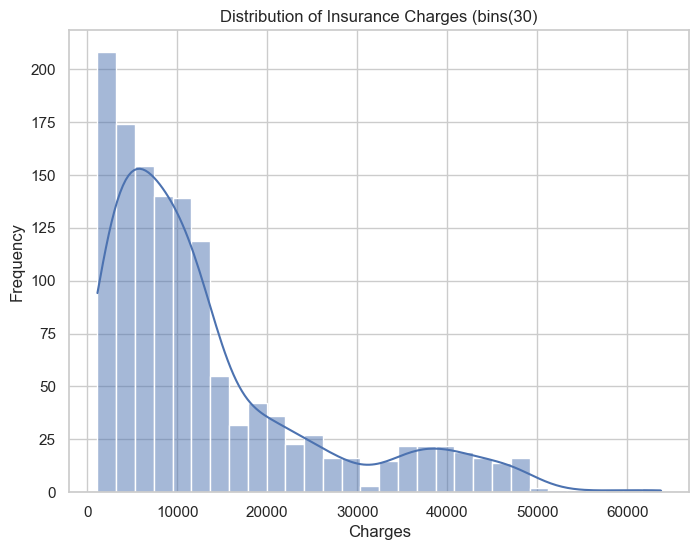

In [8]:
# Calculate IQR
q25, q75 = np.percentile(df['charges'], [25, 75])
iqr = q75 - q25

# Calculate bin width
bin_width = 2 * iqr / np.cbrt(len(df['charges']))

# Determine number of bins
n_bins = int(np.ceil((df['charges'].max() - df['charges'].min()) / bin_width))

# Plot histogram with calculated bins
plt.figure(figsize=(8,6))
sns.histplot(df['charges'], kde=True, bins=n_bins)
plt.title(f'Distribution of Insurance Charges (bins({n_bins})')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

However, it isn't nesesarry the actual apply the Freedman-Diaconis Rule. Seaborn has a builtin option to specify you want to use this rule.
Just add 'fd' as bins argument

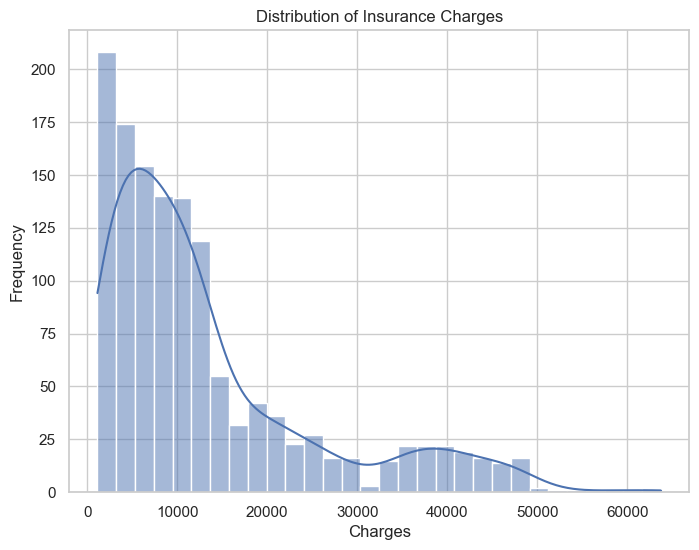

In [41]:
# Plot histogram with calculated bins
plt.figure(figsize=(8,6))
sns.histplot(df['charges'], kde=True, bins='fd')
plt.title(f'Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## Data Cleaning and Preprocessing

Prepare the data for modeling by encoding categorical variables

### Encode categorical variables using one-hot encoding

In [10]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [12]:
df_encoded.head(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


### Extract features and target

In [13]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

### Split the data into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Base model (Decision Tree Regressor)

In [15]:
clf = DecisionTreeRegressor().fit(X_train, y_train)

# Make predictions on the test set
clf_pred = clf.predict(X_test)

# Evaluate Random Forest
clf_mse = mean_squared_error(y_test, clf_pred)
clf_r2 = r2_score(y_test, clf_pred)

In [16]:
results_clf = pd.DataFrame({
    'Model': ['Decision Tree Regressor'],
    'MSE': [clf_mse],
    'R²': [clf_r2]
})

results_clf

,Model,MSE,R²
0,Decision Tree Regressor,5.185957e+07,0.665958


## Modeling with Ensemble Methods

We'll build two models: Bagging Regressor and Random Forest Regressor.

### Bagging Regressor

In [17]:
# Initialize the model
bag_reg = BaggingRegressor(n_estimators=100, random_state=42)

# Train the Bagging Regressor
bag_reg.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=42)

### Random Forest Regressor

In [18]:
# Initialize the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

Evaluate the performance of both models using Mean Squared Error (MSE) and R-squared (R²) metrics.


### Bagging

In [19]:
bag_pred = bag_reg.predict(X_test)

In [20]:
# Evaluate Bagging
bag_mse = mean_squared_error(y_test, bag_pred)
bag_r2 = r2_score(y_test, bag_pred)

In [21]:
bag_results = pd.DataFrame({
    'Model': ['Bagging'],
    'MSE': [bag_mse],
    'R²': [ bag_r2]
})

bag_results

,Model,MSE,R²
0,Bagging,2.088326e+07,0.865485


### Random Forest

In [22]:
# Predictions
rf_pred = rf_reg.predict(X_test)

In [23]:
# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

In [24]:
rf_results = pd.DataFrame({
    'Model': ['Random Forest'],
    'MSE': [rf_mse],
    'R²': [rf_r2]
})

rf_results

,Model,MSE,R²
0,Random Forest,2.094252e+07,0.865103


### Display first results

In [25]:
results = pd.DataFrame({
    'Model': ['Decision Tree Regressor','Random Forest', 'Bagging'],
    'MSE': [clf_mse,rf_mse, bag_mse],
    'R²': [clf_r2,rf_r2, bag_r2]
})

results

,Model,MSE,R²
0,Decision Tree Regressor,5.185957e+07,0.665958
1,Random Forest,2.094252e+07,0.865103
2,Bagging,2.088326e+07,0.865485


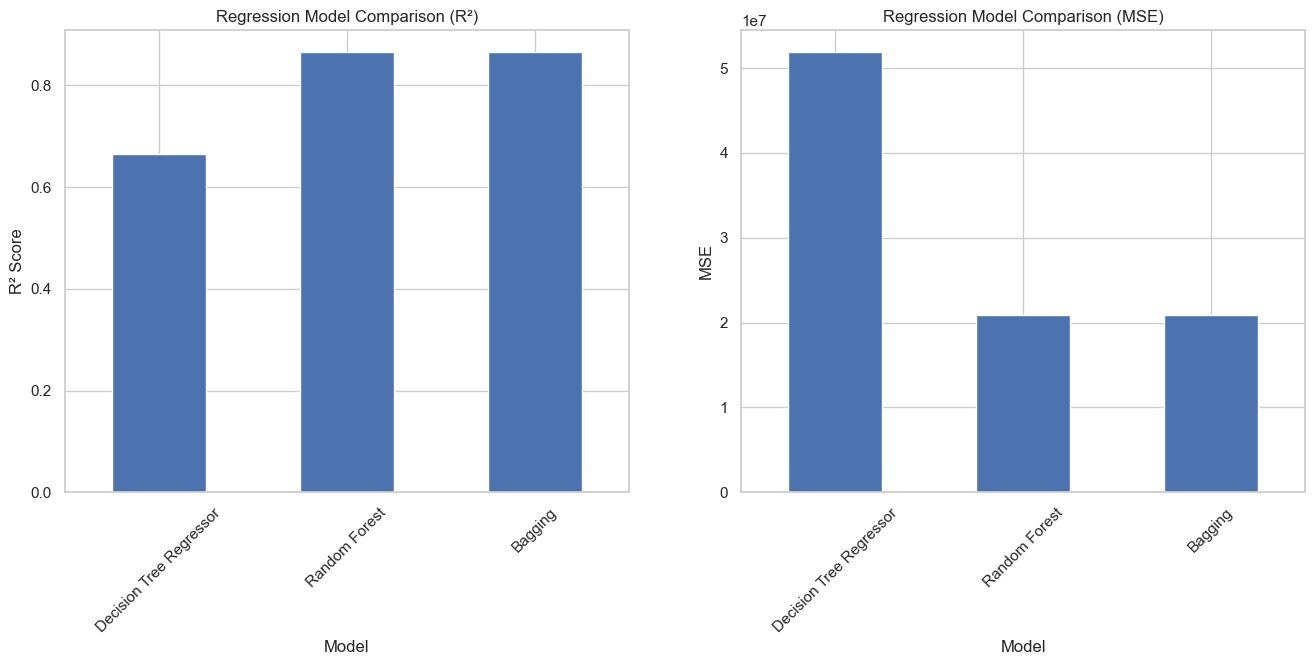

In [26]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

results.set_index('Model')['R²'].plot(kind='bar',ax=axes[0])
axes[0].set_ylabel('R² Score')
axes[0].set_title('Regression Model Comparison (R²)')

results.set_index('Model')['MSE'].plot(kind='bar',ax=axes[1])
axes[1].set_ylabel('MSE')
axes[1].set_title('Regression Model Comparison (MSE)')

# Rotate x-axis labels on all subplots
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.show()

### Out-of-Bag (OOB) Prediction

Out-of-Bag (OOB) prediction is a valuable feature of ensemble methods like Random Forest and Bagging. It allows us to estimate the model's performance without the need for a separate validation set by using the samples not included in the bootstrap training subsets for each individual tree.

#### Benefits of OOB Prediction
- **Internal Validation**: Provides a reliable estimate of model performance.
- **No Additional Data Split**: Eliminates the need for a separate validation set, making efficient use of the data.
- **Reduces Overfitting**: Helps in assessing the generalization ability of the model.

#### Implementing OOB Prediction in Our Models
We'll modify our ensemble models to enable OOB prediction and evaluate their performance using the OOB score.



In [27]:
# Initialize the models with oob_score=True
rf_reg_oob = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)
bag_reg_oob = BaggingRegressor(n_estimators=100, random_state=42, oob_score=True)

# Train the Random Forest Regressor with OOB
rf_reg_oob.fit(X_train, y_train)

# Train the Bagging Regressor with OOB
bag_reg_oob.fit(X_train, y_train)

# Retrieve OOB scores
rf_oob_score = rf_reg_oob.oob_score_
bag_oob_score = bag_reg_oob.oob_score_

# Display the OOB scores
oob_results = pd.DataFrame({
    'Model': ['Random Forest (OOB)', 'Bagging (OOB)'],
    'OOB Score': [rf_oob_score, bag_oob_score]
})

oob_results

,Model,OOB Score
0,Random Forest (OOB),0.82716
1,Bagging (OOB),0.82663


Lets use the OOB to check for best etimator parameter

C:\Users\daniel.vandam\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\daniel.vandam\AppData\Local\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:1261: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


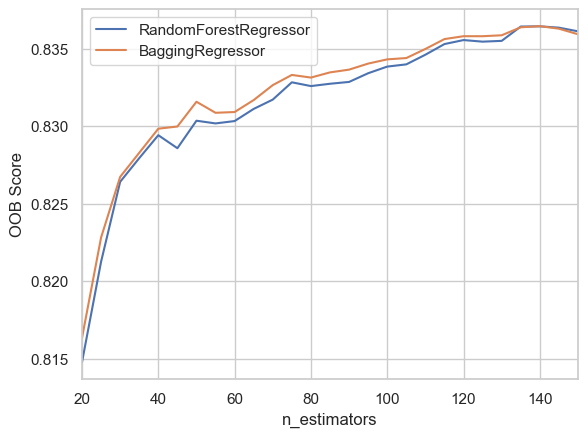

In [28]:
from collections import OrderedDict

ensemble_clfs = [
    (
        "RandomForestRegressor",
        RandomForestRegressor(
            oob_score=True,
            random_state=42,
        ),
    ),
    (
        "BaggingRegressor",
        BaggingRegressor(
            oob_score=True,
            random_state=42,
        ),
    )
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
oob_scores = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_score = clf.oob_score_
        oob_scores[label].append((i, oob_score))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in oob_scores.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB Score")
plt.legend(loc="upper left")
plt.show()

#### Interpreting OOB Scores

The OOB scores provide an unbiased estimate of the model's performance on unseen data. Higher OOB scores indicate better generalization.

Let's compare the OOB scores with our previous evaluation metrics.



#### Compare OOB Scores with Test Set Performance

In [29]:
# Combine previous results with OOB scores
combined_results = results.copy()
combined_results['OOB R²'] = [None,rf_oob_score, bag_oob_score]

combined_results

,Model,MSE,R²,OOB R²
0,Decision Tree Regressor,5.185957e+07,0.665958,NaN
1,Random Forest,2.094252e+07,0.865103,0.82716
2,Bagging,2.088326e+07,0.865485,0.82663


#### Observations
- **Random Forest**: The OOB R² score is close to the R² score on the test set, indicating good generalization.
- **Bagging**: Similarly, the OOB R² score aligns well with the test set performance.

This consistency between OOB and test set evaluations suggests that our models are performing reliably and not overfitting the training data.

## Results

Compare the actual vs predicted values

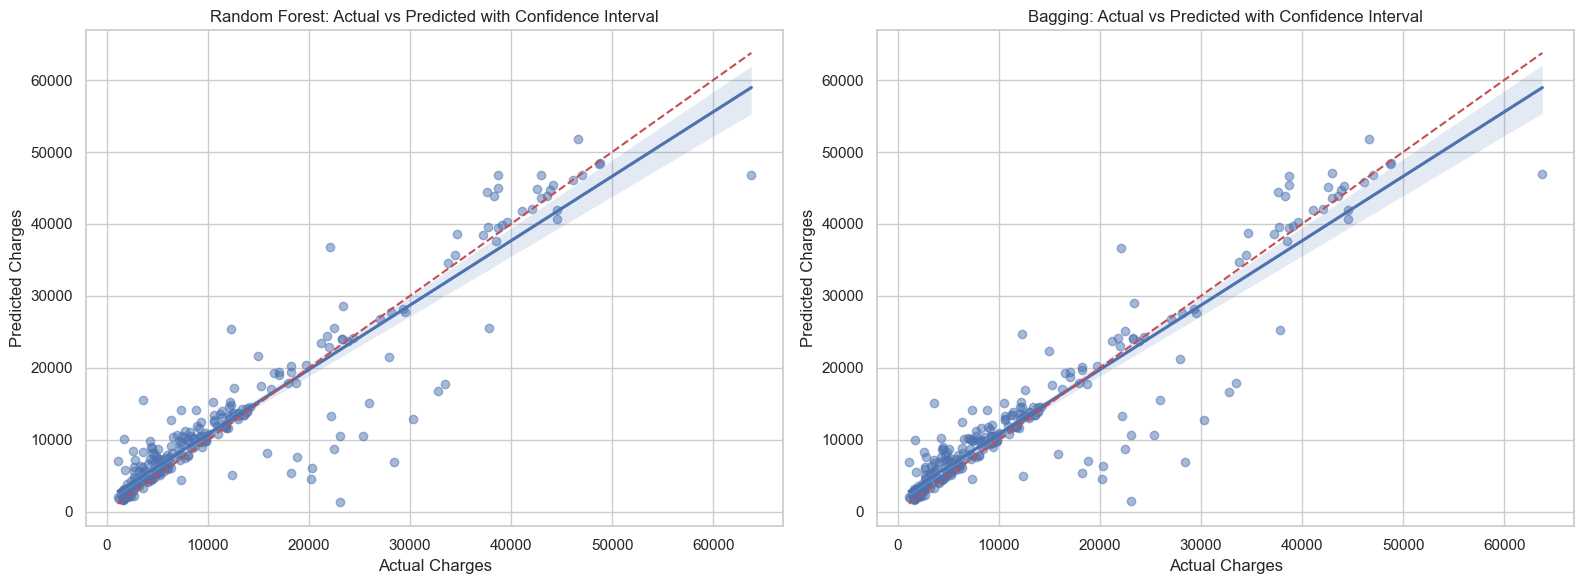

In [30]:
# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Actual vs Predicted for Random Forest
sns.regplot(ax=axes[0], x=y_test, y=rf_pred, ci=95, scatter_kws={'alpha':0.5})
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[0].set_xlabel('Actual Charges')
axes[0].set_ylabel('Predicted Charges')
axes[0].set_title('Random Forest: Actual vs Predicted with Confidence Interval')

# Actual vs Predicted for Bagging
sns.regplot(ax=axes[1], x=y_test, y=bag_pred, ci=95, scatter_kws={'alpha':0.5})
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
axes[1].set_xlabel('Actual Charges')
axes[1].set_ylabel('Predicted Charges')
axes[1].set_title('Bagging: Actual vs Predicted with Confidence Interval')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


## Interpretability

While ensemble methods like Random Forest and Bagging provide robust predictive performance, understanding how these models make decisions is crucial, especially in actuarial contexts where transparency and interpretability are essential. In this section, we'll explore techniques to interpret our ensemble models, focusing on feature importance and partial dependence plots.

### Why Interpretability Matters
- **Regulatory Compliance**: Actuarial models often need to comply with regulatory standards that require clear explanations of predictions.
- **Business Insights**: Understanding which factors influence predictions helps in making informed business decisions.
- **Model Trust**: Transparent models build trust among stakeholders and clients.

### Techniques for Model Interpretability
1. **Feature Importance**: Identifies which features contribute most to the model's predictions.
2. **Partial Dependence Plots (PDPs)**: Visualize the relationship between a feature and the target variable, holding other features constant.

We'll implement Feature Importance and Partial Dependence Plots using `scikit-learn` and `matplotlib`.


#### Feature Importance

The feature importance plot illustrates the relative importance of each feature in making predictions. Features with higher importance scores have a more significant impact on the target variable.

These insights help actuaries understand which factors are driving insurance charges, allowing for better risk assessment and pricing strategies.

#### Partial Dependence Plots (PDPs)

Partial Dependence Plots show the relationship between a feature and the target variable, marginalizing over the distribution of other features. This helps in understanding how changes in a single feature affect the prediction.


PDPs provide a more nuanced view of feature effects, complementing the feature importance analysis.


### Feature Importances

#### Random Forest

In [31]:
importances = rf_reg.feature_importances_
feature_names = X.columns
feature_importances_rf = pd.Series(importances, index=feature_names).sort_values(ascending=False)

feature_importances_rf

smoker_yes          0.608618
bmi                 0.216506
age                 0.134232
children            0.019413
sex_male            0.006379
region_northwest    0.005587
region_southeast    0.005314
region_southwest    0.003950
dtype: float64

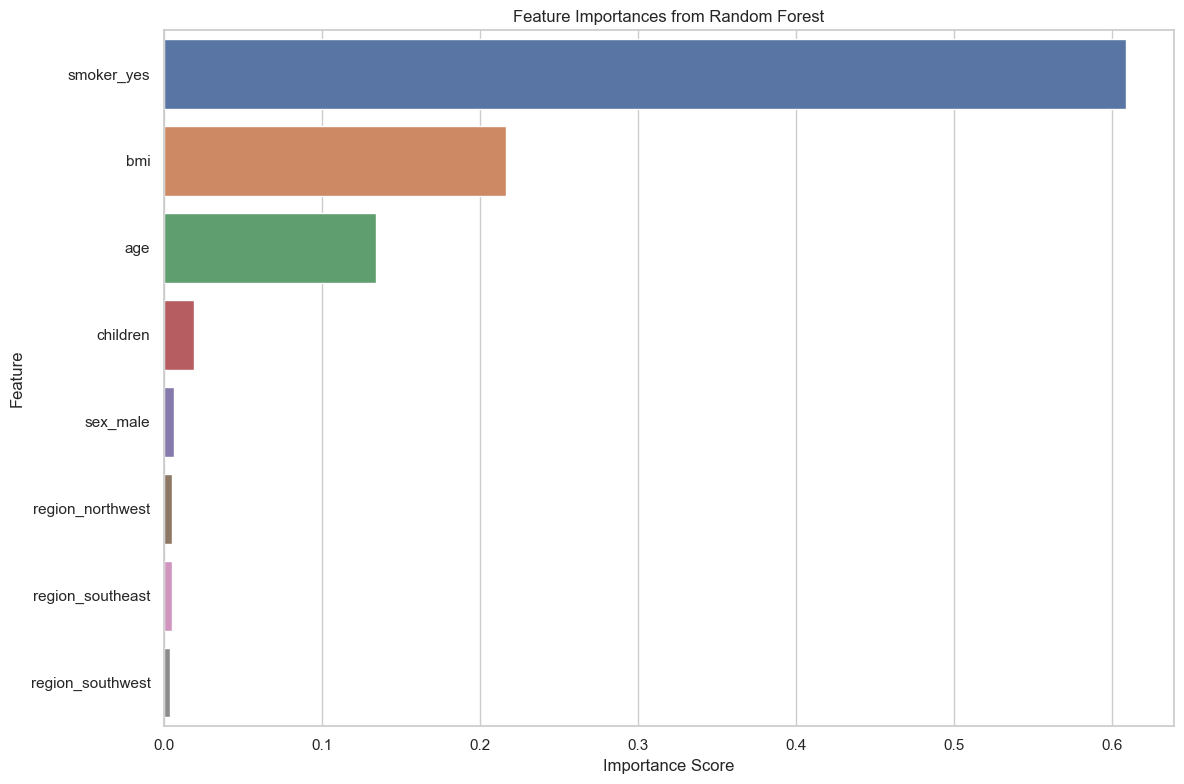

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x=feature_importances_rf, y=feature_importances_rf.index)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### Bagging

In [33]:
feature_importances_bag = pd.DataFrame()

for i, estimator in enumerate(bag_reg.estimators_):
    importances = estimator.feature_importances_
    feature_importances_bag[f'Estimator_{i+1}'] = importances

feature_importances_bag.index = X.columns

feature_importances_bag

,Estimator_1,Estimator_2,Estimator_3,Estimator_4,Estimator_5,Estimator_6,Estimator_7,Estimator_8,Estimator_9,Estimator_10,...,Estimator_91,Estimator_92,Estimator_93,Estimator_94,Estimator_95,Estimator_96,Estimator_97,Estimator_98,Estimator_99,Estimator_100
age,0.134575,0.124290,0.140972,0.132616,0.139303,0.119379,0.129873,0.136954,0.143859,0.127504,...,0.143112,0.132464,0.137111,0.146734,0.135802,0.130868,0.134369,0.128377,0.135321,0.123452
bmi,0.209164,0.215806,0.231402,0.207309,0.206640,0.195329,0.223014,0.197633,0.219299,0.192814,...,0.218548,0.228154,0.227406,0.212334,0.209221,0.234858,0.231476,0.198355,0.205386,0.231198
children,0.016204,0.022162,0.012619,0.013367,0.028685,0.015205,0.014329,0.015700,0.020448,0.019433,...,0.019298,0.017159,0.022865,0.029689,0.015436,0.014319,0.024544,0.011101,0.020895,0.015834
sex_male,0.003694,0.007880,0.007775,0.009528,0.013510,0.004723,0.003008,0.012602,0.009957,0.004612,...,0.001737,0.002776,0.008302,0.004447,0.005053,0.008675,0.010092,0.003170,0.009300,0.003169
smoker_yes,0.622990,0.609801,0.590779,0.621315,0.599814,0.646648,0.618061,0.621516,0.597232,0.640752,...,0.597232,0.607232,0.585066,0.589594,0.621099,0.600706,0.585085,0.637289,0.603808,0.614901
region_northwest,0.005440,0.010496,0.005653,0.006331,0.003782,0.007974,0.006095,0.002518,0.001596,0.004106,...,0.004189,0.004275,0.008602,0.005530,0.004262,0.003751,0.005625,0.005099,0.011329,0.004242
region_southeast,0.003770,0.005086,0.006653,0.005114,0.004835,0.004250,0.005265,0.007659,0.005225,0.004352,...,0.002934,0.005793,0.008388,0.007888,0.007502,0.004666,0.005332,0.012489,0.007390,0.004615
region_southwest,0.004163,0.004478,0.004146,0.004420,0.003432,0.006491,0.000356,0.005418,0.002384,0.006426,...,0.012949,0.002147,0.002260,0.003784,0.001625,0.002157,0.003477,0.004121,0.006570,0.002587


Calculate the mean importance for each feature

Computing the average feature importances across all estimators in a Bagging ensemble is informative for several reasons:

Stability and Robustness: Individual estimators in a Bagging ensemble are trained on different subsets of the data. By averaging their feature importances, you get a more stable and robust estimate of feature importance that is less sensitive to the peculiarities of any single training subset.

Overall Importance: Averaging gives you a single measure of importance for each feature, making it easier to interpret and compare the relative importance of different features.

Reduces Variability: Individual estimators may have high variability in their feature importance scores due to the randomness in the data subsets they are trained on. Averaging these scores helps to smooth out this variability.


In [34]:
mean_importances_bag = feature_importances_bag.mean(axis=1)
mean_importances_bag = mean_importances_bag.sort_values(ascending=False)

mean_importances_bag

smoker_yes          0.608618
bmi                 0.216869
age                 0.133840
children            0.019277
sex_male            0.006619
region_southeast    0.005512
region_northwest    0.005347
region_southwest    0.003917
dtype: float64

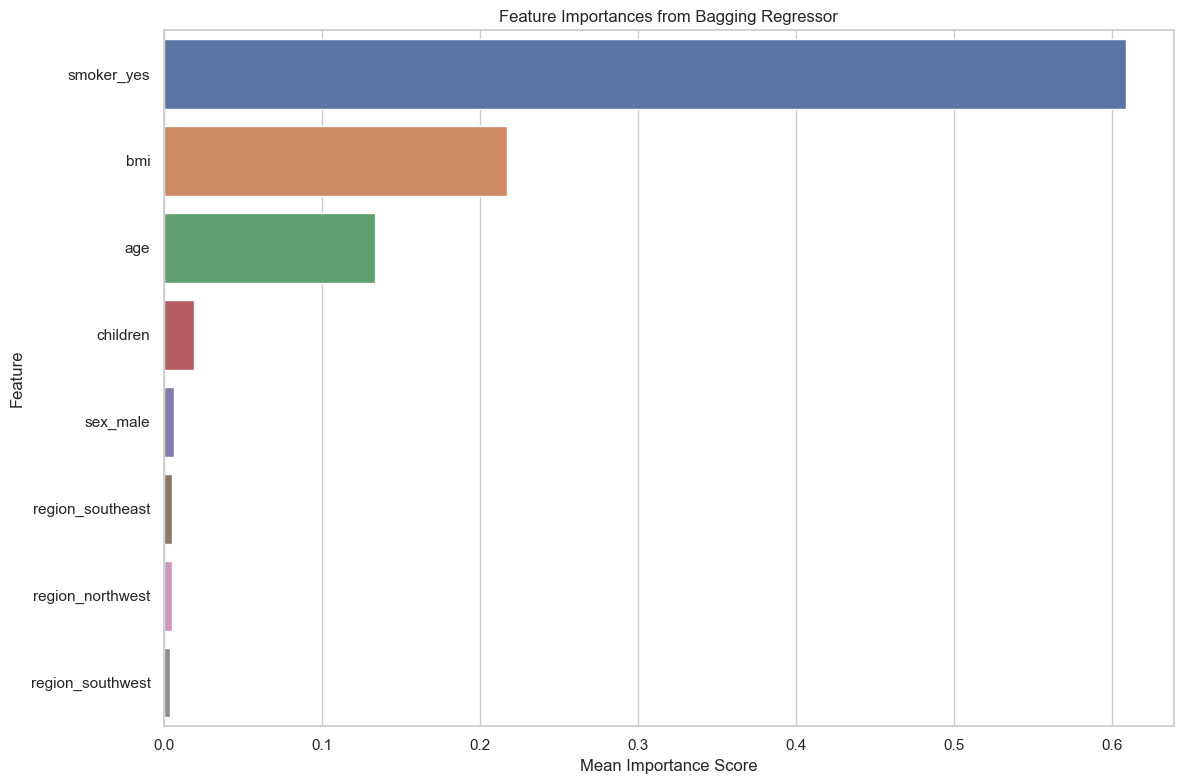

In [35]:
# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_importances_bag, y=mean_importances_bag.index)

# Add titles and labels
plt.title('Feature Importances from Bagging Regressor')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')

# Optimize layout
plt.tight_layout()

# Display the plot
plt.show()

### PartialDependence

In [36]:
# Select top 3 features
top_features = feature_importances_rf.index[:3]
top_features

Index(['smoker_yes', 'bmi', 'age'], dtype='object')

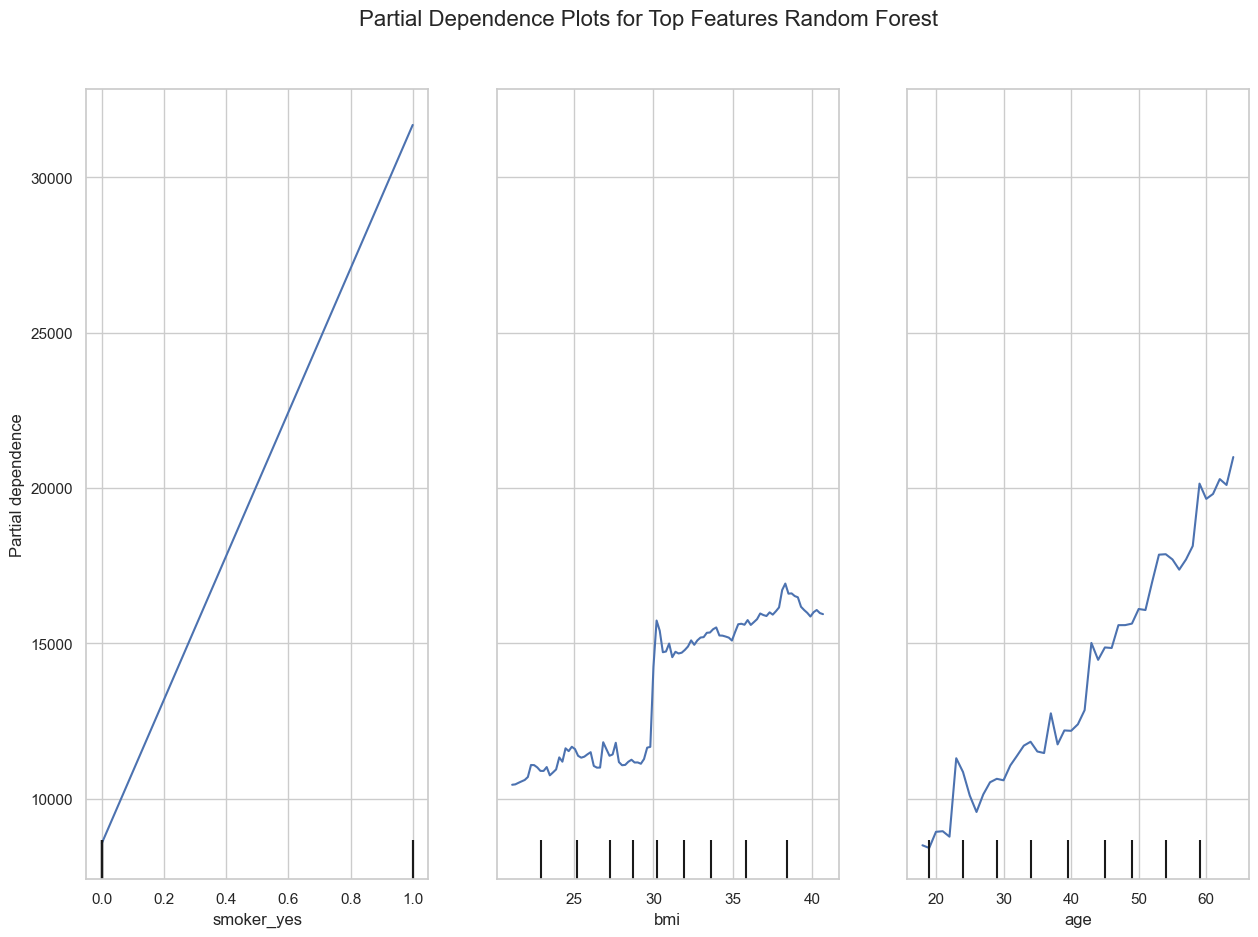

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    rf_reg,
    X_train,
    features=top_features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots for Top Features Random Forest', fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
plt.show()

In [38]:
# Select top 3 features
top_features = mean_importances_bag.index[:3]
top_features

Index(['smoker_yes', 'bmi', 'age'], dtype='object')

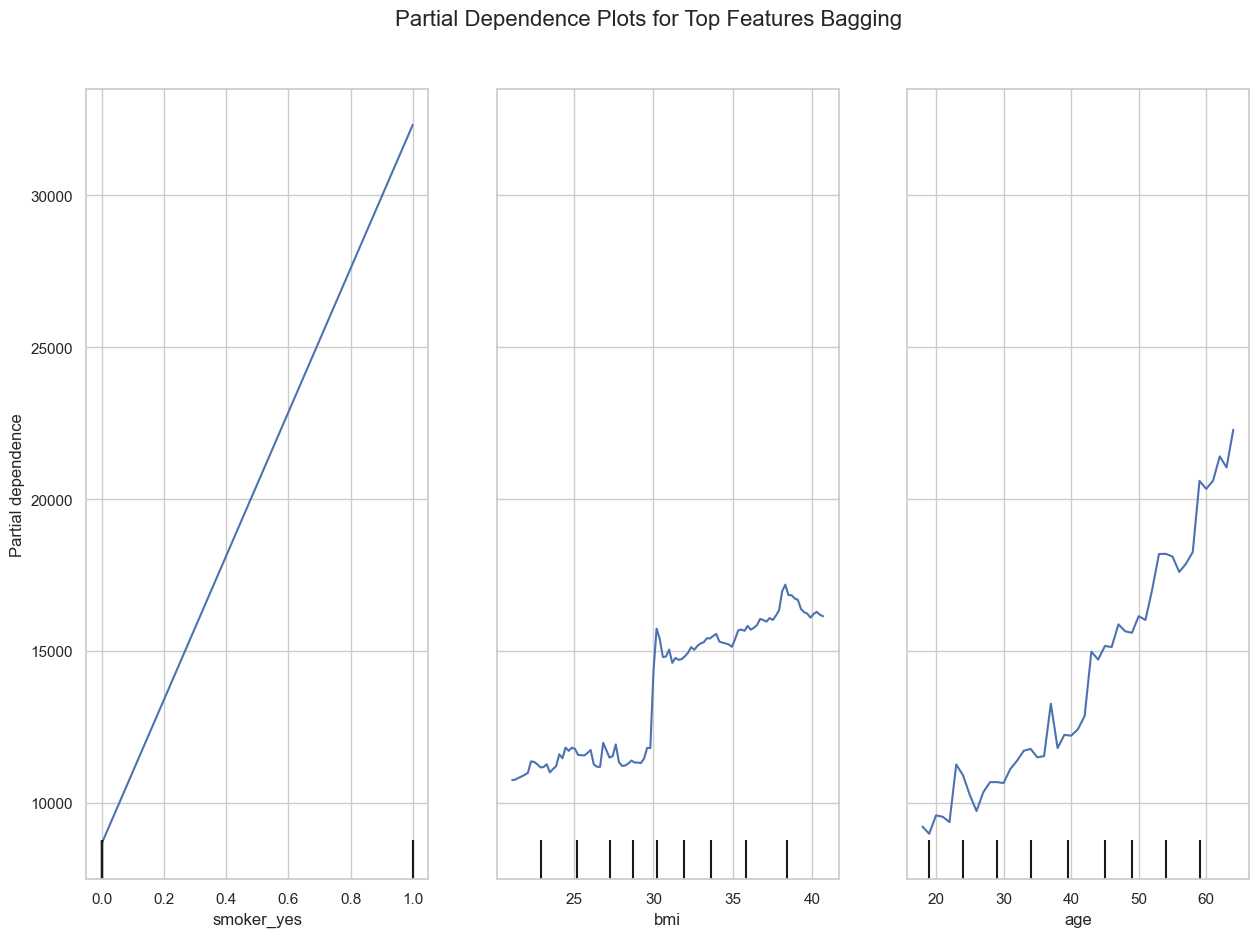

In [39]:
fig, ax = plt.subplots(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    bag_reg,
    X_train,
    features=top_features,
    ax=ax
)
plt.suptitle('Partial Dependence Plots for Top Features Bagging',
             fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
plt.show()

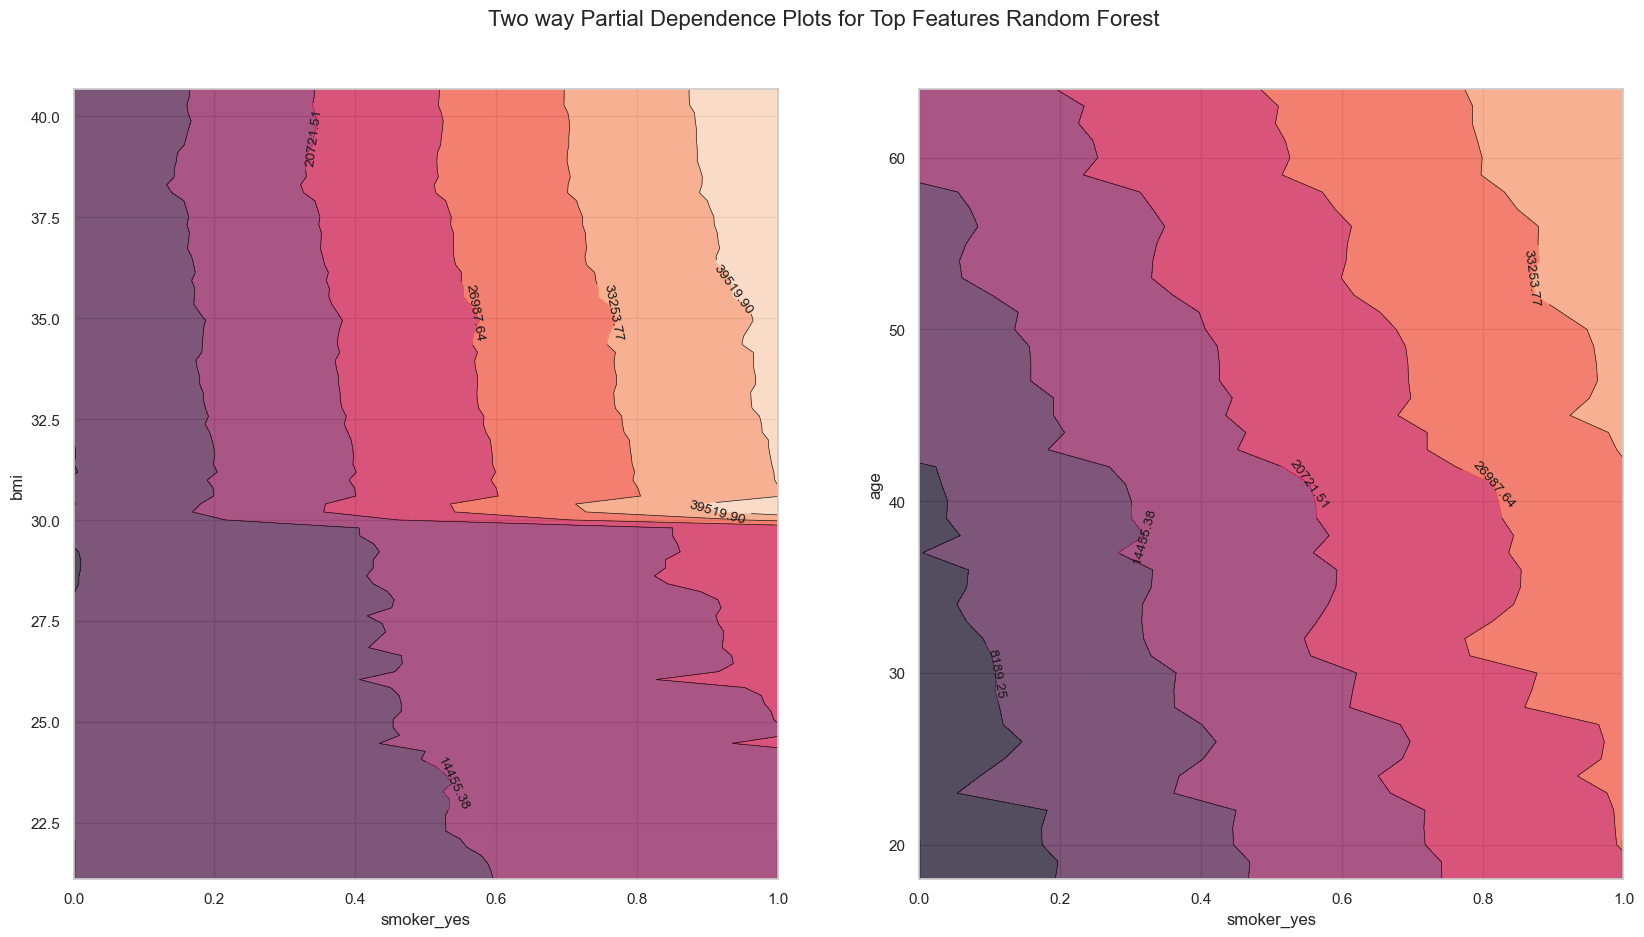

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
PartialDependenceDisplay.from_estimator(
    rf_reg,
    X_train,
    features=[{'smoker_yes', 'bmi'},{'smoker_yes', 'age'}],
    ax=ax
)
plt.suptitle('Two way Partial Dependence Plots for Top Features Random Forest',
             fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust to make room for the title
plt.show()

## Conclusion

- **Random Forest** and **Bagging** regressors both improved prediction accuracy compared to the individual model.
- Random Forest showed slightly better performance with a higher R² and lower MSE.
- Feature importance analysis revealed that variables like `age`, `bmi`, and `smoker_yes` significantly impact insurance charges.
- Ensemble methods help in improving model generalizability and reducing overfitting, making them suitable for actuarial predictions.